In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [74]:
claims = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv')
cust = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')


In [75]:
cust.rename(columns={'CUST_ID':'customer_id'}, inplace=True)

In [76]:
cust_claims = claims.merge(cust, on ='customer_id', how='left')

In [77]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [82]:
cust_claims['claim_amount'] = cust_claims['claim_amount'].replace({'\$': ''}, regex=True).astype(float)

cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [83]:
cust_claims['alert_flag'] = cust_claims['police_report'].apply(lambda x: 0 if x == 'No' else 1)
[cust_claims.alert_flag]

[0       0
 1       1
 2       0
 3       0
 4       0
        ..
 1095    0
 1096    0
 1097    0
 1098    1
 1099    1
 Name: alert_flag, Length: 1100, dtype: int64]

In [84]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'])
cust_claims.sort_values(by=['customer_id', 'claim_date'], ascending=[True, False], inplace=True)
unique_customers_data = cust_claims.drop_duplicates(subset='customer_id', keep='first')
unique_customers_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
184,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,23-May-78,DE,962-879-1238,Platinum,0
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,20-Dec-72,TX,173-892-6314,Silver,0
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,28-Jul-88,FL,364-598-1549,Silver,1
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,19-Aug-71,CA,187-348-8375,Gold,1
505,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,10-Aug-80,NC,798-862-5398,Gold,0


In [85]:
for column in cust_claims.columns:
    if cust_claims[column].dtype == 'float64':
                cust_claims[column].fillna(cust_claims[column].mean(), inplace=True)
    elif cust_claims[column].dtype == 'object':
               cust_claims[column].fillna(cust_claims[column].mode()[0], inplace=True)
cust_claims.reset_index(drop=True, inplace=True)
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12442.125121,1.0,Yes,Female,23-May-78,DE,962-879-1238,Platinum,0
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,20-Dec-72,TX,173-892-6314,Silver,0
2,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,28-Jul-88,FL,364-598-1549,Silver,1
3,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,19-Aug-71,CA,187-348-8375,Gold,1
4,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,10-Aug-80,NC,798-862-5398,Gold,0


In [86]:
cust_claims["DateOfBirth"] = pd.to_datetime(cust_claims.DateOfBirth, format = "%d-%b-%y")
cust_claims.loc[(cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claims[cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [88]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust_claims['DateOfBirth']).year          
x = dob_year-100                                               
v = curr_year - x
y = curr_year - dob_year
cust_claims['age'] = (np.where(dob_year > curr_year,v,y))
cust_claims.loc[(cust_claims.age < 18),'AgeGroup'] = 'Children'
cust_claims.loc[(cust_claims.age >=18) & (cust_claims.age <30),'AgeGroup'] = 'Youth'
cust_claims.loc[(cust_claims.age >=30) & (cust_claims.age <60),'AgeGroup'] = 'Adult'
cust_claims.loc[(cust_claims.age >=60),'AgeGroup'] = 'Senior'

In [90]:
cust_claims.head(10)
cust_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     824
Senior    102
Youth     174
Name: age, dtype: int64

In [91]:
avg_amt_segment= round(cust_claims.groupby(["Segment"])["claim_amount"].mean(),2)
avg_amt_segment

Segment
Gold        12746.45
Platinum    12340.89
Silver      12206.38
Name: claim_amount, dtype: float64

In [92]:
amt_incedent= round(cust_claims.loc[cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
amt_incedent

incident_cause
total_Crime                  729472.63
total_Driver error          3348655.50
total_Natural causes        1316440.63
total_Other causes          3779869.38
total_Other driver error    3384045.13
Name: claim_amount, dtype: float64

In [93]:
cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'alert_flag', 'age', 'AgeGroup'],
      dtype='object')

In [94]:
adults_claims_count= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver") & (cust_claims.State== "TX") | (cust_claims.State== "DE") | (cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()
adults_claims_count

State
AK    20
DE    29
TX    10
Name: claim_amount, dtype: int64

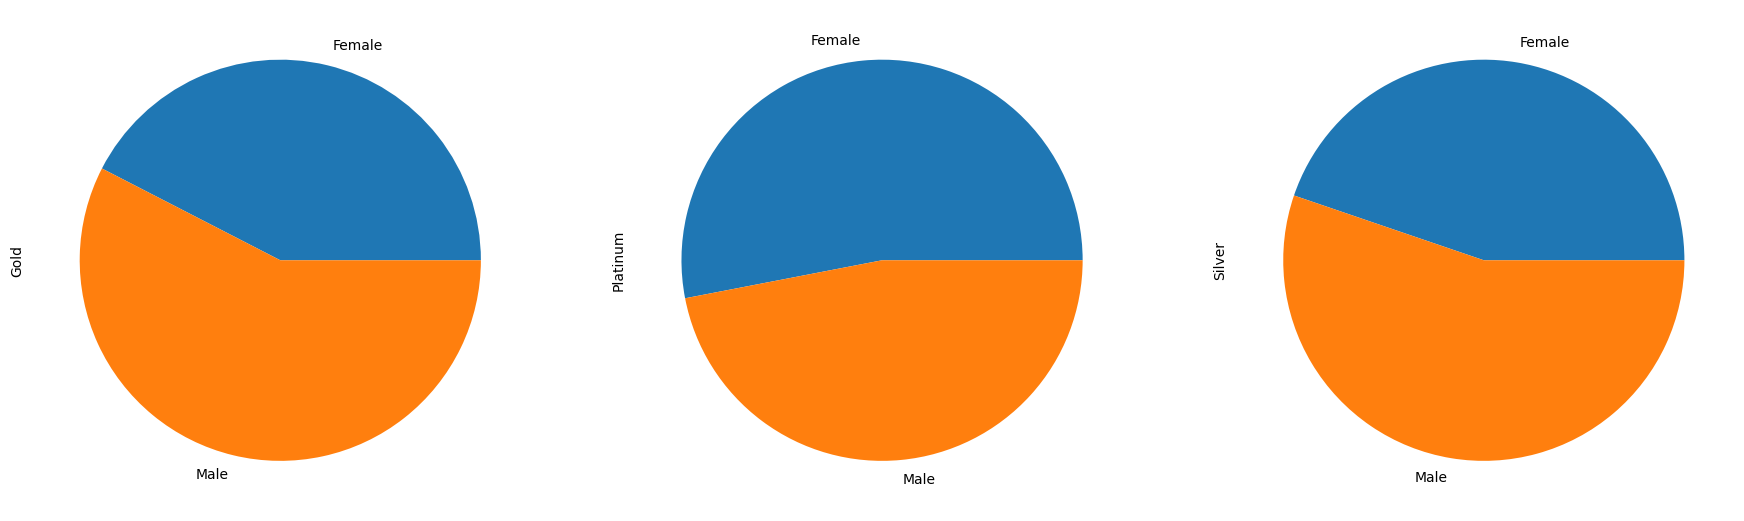

In [95]:
claim_gender_segment= round(cust_claims.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
claim_gender_segment
claim_gender_segment_pivot= claim_gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
claim_gender_segment_pivot
claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(22,12))
plt.show()

[]

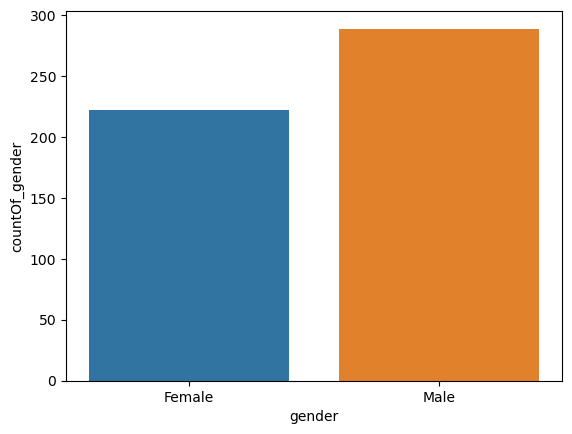

In [97]:
import seaborn as sns
claim_gender_driver= cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
claim_gender_driver
sns.barplot(x= "gender", y= "countOf_gender", data= claim_gender_driver)
plt.plot()

[]

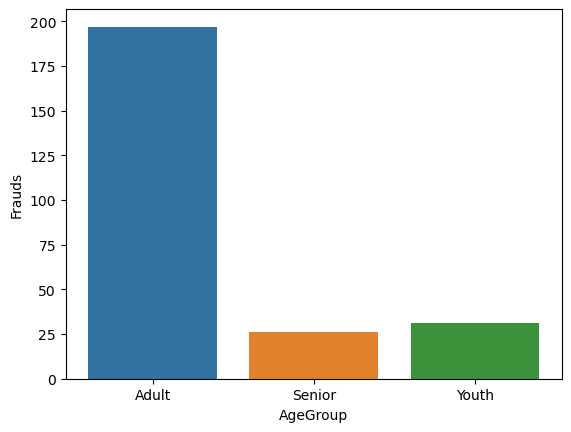

In [98]:
cust_claims["Frauds"]= np.where(cust_claims.fraudulent == "Yes",1,0)
cust_claims
agegroup_max_frauds= cust_claims.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
agegroup_max_frauds
sns.barplot(x= "AgeGroup", y="Frauds", data=agegroup_max_frauds )
plt.plot()

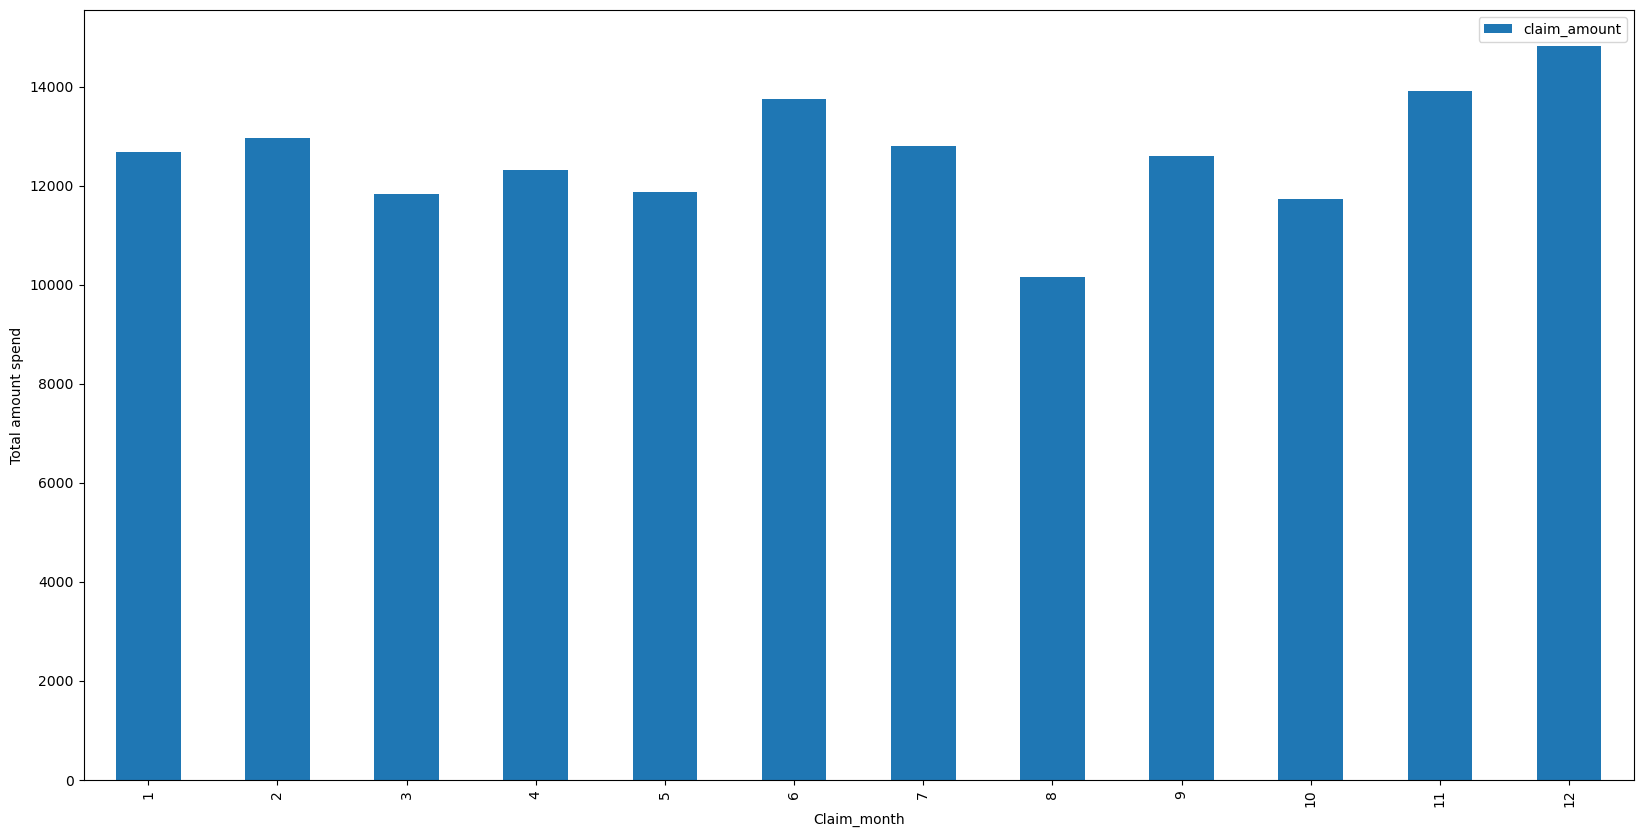

In [100]:
cust_claims['claim_month'] = pd.to_datetime(cust_claims['claim_date'])
cust_claims['Claim_month'] = cust_claims['claim_month'].dt.month
cust_claims.head(10)
pd.pivot_table(cust_claims,index="Claim_month",values="claim_amount").plot(kind='bar',figsize=(20,10))
plt.ylabel('Total amount spend')
plt.show()

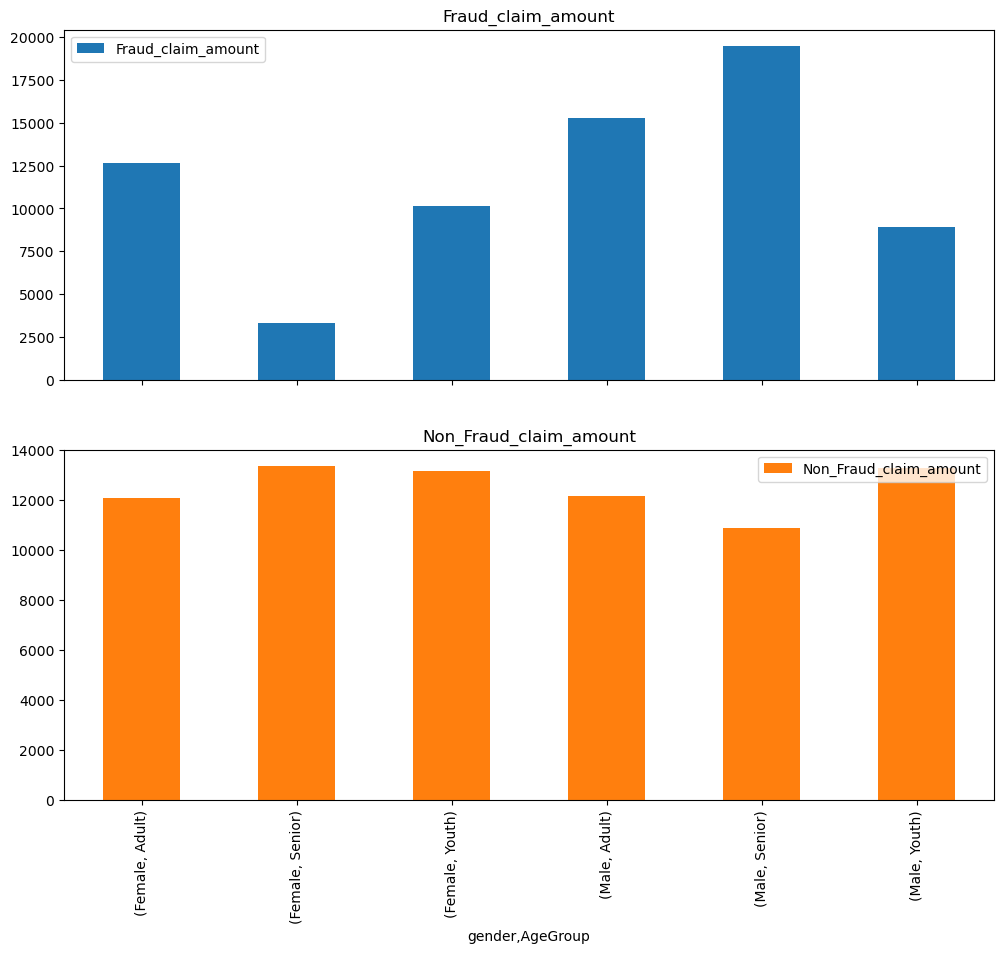

In [101]:
frauds_amount_gender= pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
non_frauds_amount_gender=pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))
claims_age_gender=round(pd.merge(frauds_amount_gender,non_frauds_amount_gender, on=["gender","AgeGroup"]),2)
claims_age_gender
claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(12,10))
plt.show()

In [102]:
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=="Male"]
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=="Female"]
print("The average amount claimed by males is {}".format(claim_male.mean()))
print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12795.000007614406
The average amount claimed by females is 12061.233702272999


In [104]:
import scipy.stats as stats
eq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=True)    # equal variance
eq_var.statistic

0.9105252193597447

In [105]:
uneq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=False)    # UnEqual variance
uneq_var.statistic


0.9116109971881289

In [108]:
st= eq_var.statistic
pv= eq_var.pvalue
print("For the above test, the st-score is {} and the pv-value is {}".format(st,pv))
if(pv<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

For the above test, the st-score is 0.9105252193597447 and the pv-value is 0.3627454254155206
We fail to reject null hypothesis


In [109]:
agecat_seg = pd.crosstab(cust_claims.AgeGroup, cust_claims.Segment, margins = True)
chi_test = stats.chi2_contingency(observed= agecat_seg)
print("The chi square stat is {} and the p value is {}".format(chi_test[0],chi_test[1]))

The chi square stat is 1.1990666113231194 and the p value is 0.9988247834561567


In [121]:
avg_claim_2016_17 = amt_2016_17.mean()
diff_claim = current_year.mean() - avg_claim_2016_17
t_stat, p_value = stats.ttest_1samp(current_year, popmean=avg_claim_2016_17)
significance_level = 0.05
if p_value < significance_level:
    print("The difference in claim amounts is statistically significant.")
else:
    print("The difference in claim amounts is not statistically significant.")
print("Difference in claim amounts:", diff_claim)
print("T-statistic:", t_stat)
print("P-value:", p_value)

The difference in claim amounts is not statistically significant.
Difference in claim amounts: 355.5622549434411
T-statistic: 0.5876204787585442
P-value: 0.5570561038218577


In [123]:
age_group_1 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Youth"]
age_group_2 = cust_claims['total_policy_claims'].loc[cust_claims['AgeGroup']=="Adult"]
anova = stats.f_oneway(age_group_1,age_group_2)
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.7891448008185136 and the p value is 0.37457332292027223
We fail to reject null hypothesis


In [124]:
cust_claims['total_policy_claims'] = pd.to_numeric(cust_claims['total_policy_claims'])
cust_claims.total_policy_claims.corr(other= cust_claims.claim_amount)

-0.019490781428136723